# Domácí úkol


# Sparse matice (sousednosti)
Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). 

Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
- hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
- mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

**Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:**
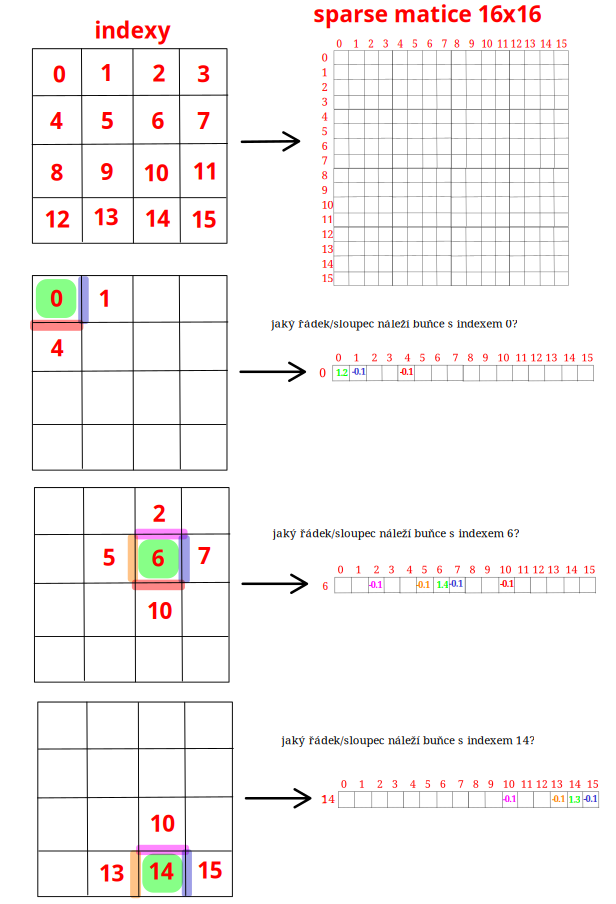

Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```

## Úkol 1.
**Sestavte matici pomocí formátu `LIL` a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě.** 
 - vypište a vykreslete jako obrázek pro $n=3$ a $\varepsilon = 0.1$.
 - vykreslete jako obrázek pro $n=100$ a $\varepsilon = 0.2$. 

In [6]:
import scipy.sparse as sparse

# let's create it as a function 
def sparse_lil_net(n, epsilon): 
    A = sparse.lil_matrix((n*n, n*n))

    for i in range(n):
        for j in range(n):
            idx = i * n + j 
            k = 0
    
            # upper neighbour
            if i > 0:
                A[idx, idx - n] = -epsilon
                k += 1

            # lower neighbour
            if i < n - 1:
                A[idx, idx + n] = -epsilon
                k += 1
    
            # left neighbour
            if j > 0: 
                A[idx, idx - 1] = -epsilon
                k += 1
                
            # right neighbour 
            if j < n - 1: 
                A[idx, idx + 1] = -epsilon
                k += 1
            
            A[idx, idx] = 1 + k * epsilon

    return A

In [7]:
n = 3
epsilon = 1e-1

A = sparse_lil_net(n, epsilon)
print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


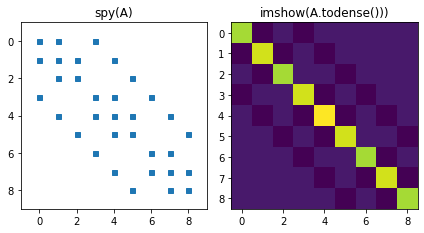

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].spy(A, markersize=5)
axes[0].set_xlim(-1, n * n)
axes[0].set_ylim(n * n, -1)
axes[0].set_title("spy(A)")
axes[0].xaxis.set_ticks_position("bottom")

axes[1].imshow(A.todense())
axes[1].set_title("imshow(A.todense()))")

plt.tight_layout()
plt.show()

In [9]:
n = 100
epsilon = 2e-1
B = sparse_lil_net(n, epsilon)
print(B.todense())

[[ 1.4 -0.2  0.  ...  0.   0.   0. ]
 [-0.2  1.6 -0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  1.6 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.6 -0.2  0. ]
 [ 0.   0.   0.  ... -0.2  1.6 -0.2]
 [ 0.   0.   0.  ...  0.  -0.2  1.4]]


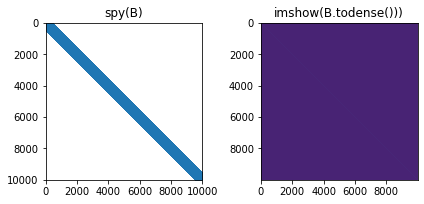

In [10]:
fig, axes = plt.subplots(1, 2)

# almost nothing is visible with imshow, that's why we plot both with imshow and spy
axes[0].spy(B, markersize=5)
axes[0].set_xlim(-1, n * n)
axes[0].set_ylim(n * n, -1)
axes[0].set_title("spy(B)")
axes[0].xaxis.set_ticks_position("bottom")

axes[1].imshow(B.todense())
axes[1].set_title("imshow(B.todense()))")

plt.tight_layout()
plt.show()

## Úkol 2. 

Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
- Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
- Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

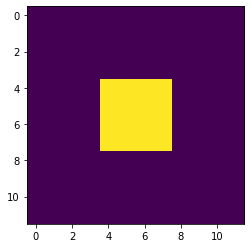

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
epsilon = 2e-1
#A = A_efficiently(n, epsilon)
A = sparse_lil_net(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

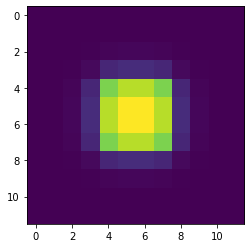

In [12]:
import scipy as sp
import scipy.sparse.linalg as sla

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
x = sla.spsolve(A.tocsr(), b)

plt.figure()
plt.imshow(x.reshape(n, n))
plt.show()

[ 0.00000000e+00  1.69406589e-21  1.35525272e-20  0.00000000e+00
 -2.16840434e-19 -4.33680869e-19 -1.08420217e-19 -1.08420217e-19
 -2.71050543e-20  6.77626358e-21 -1.69406589e-21  8.47032947e-22
 -5.08219768e-21  0.00000000e+00 -2.71050543e-20 -3.25260652e-19
 -8.67361738e-19  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.08420217e-19 -2.71050543e-20  1.35525272e-20 -1.69406589e-21
 -1.01643954e-20  0.00000000e+00 -1.08420217e-19 -8.67361738e-19
  0.00000000e+00  6.93889390e-18  0.00000000e+00  0.00000000e+00
 -2.60208521e-18  1.08420217e-19  0.00000000e+00 -6.77626358e-21
 -2.71050543e-20  2.16840434e-19 -8.67361738e-19  0.00000000e+00
 -2.77555756e-17  2.77555756e-17  2.77555756e-17 -5.55111512e-17
  0.00000000e+00 -1.73472348e-18  2.16840434e-19 -2.71050543e-20
  0.00000000e+00  8.67361738e-19  1.73472348e-18  3.46944695e-17
  0.00000000e+00 -2.22044605e-16  0.00000000e+00 -4.44089210e-16
 -2.42861287e-17  4.33680869e-19  4.33680869e-19  4.06575815e-20
  1.35525272e-20 -9.75781

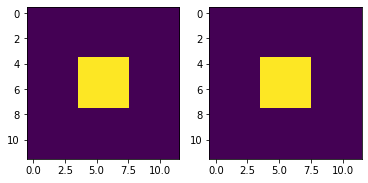

In [13]:
# check result
b_check = A @ x

print(b_check - b) # should be (almost) zero

fig, axes = plt.subplots(1, 2)

axes[0].imshow(b_check.reshape(n, n))
axes[1].imshow(b.reshape(n, n))

plt.show()

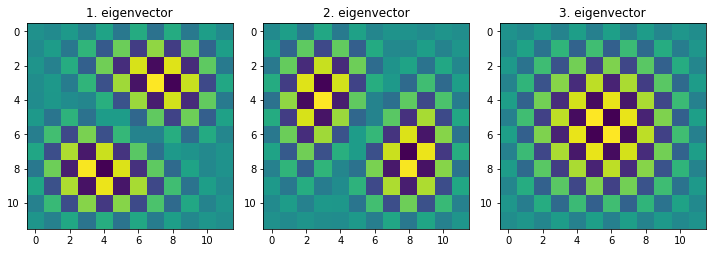

In [14]:
# TODO - spočtěte a vykreslete vlastní vektory matice A
eigenvals, eigenvecs = sla.eigsh(A, k = 3)

plt.figure(figsize=(10, 4))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(eigenvecs[:, i].reshape(n, n))
    plt.title(f"{i + 1}. eigenvector")

plt.tight_layout()
plt.show()

# Bonusový úkol

**Sestavte matici $A$ z úkolu 1. bez použití cyklů.**
- porovnejte výsledky z úkolu 1 a 2 pro různé hodnoty $n$ a $\varepsilon$.

Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. 

Hint, jak na to: 
- Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
    - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
        - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
        - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
    - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
        - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
- Tyto pole vytvořte vektorizovaně - bez cyklů

In [18]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n * n - n) # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = np.arange(n, n * n) # TODO - vytvořte indexy buněk pod hranou
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_up_idx)) # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = np.hstack((horizontal_up_idx, horizontal_up_idx)) # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    print(horizontal_up_idx)
    print(horizontal_low_idx)
    print(row_horizontal)
    print(col_horizontal)
    print(data_horizontal)


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[:-n] # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = index_matrix_vertical[n:] # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx)) # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = np.hstack((vertical_left_idx, vertical_right_idx)) # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    print(index_matrix_vertical)
    print(vertical_left_idx)
    print(vertical_right_idx)
    print(row_vertical)
    print(col_vertical)
    print(data_vertical)


    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    data_diag[:n] -= epsilon # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    data_diag[-n:] -= epsilon # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    data_diag[::n] -= epsilon # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    data_diag[n-1::n] -= epsilon # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col))) # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())


[0 1 2 3 4 5]
[3 4 5 6 7 8]
[0 1 2 3 4 5 0 1 2 3 4 5]
[0 1 2 3 4 5 0 1 2 3 4 5]
[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
[0 3 6 1 4 7 2 5 8]
[0 3 6 1 4 7]
[1 4 7 2 5 8]
[0 3 6 1 4 7 1 4 7 2 5 8]
[0 3 6 1 4 7 1 4 7 2 5 8]
[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
[[0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.1]]
